In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [32]:
class_names = ['kruzhki', 'tarelki']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
print (class_names_label)

{'kruzhki': 0, 'tarelki': 1}


In [41]:
def load_data():
   
    datasets = ['data/train', 'data/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            if folder == ".DS_Store":
                continue
            label = class_names_label[folder]
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                if (".DS_Store" in img_path):
                    continue
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output


In [43]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 0/206 [00:00<?, ?it/s]

Loading data/train


100%|██████████| 27/27 [00:00<00:00, 1889.70it/s]

Loading data/test


In [44]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [45]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 458
Number of testing examples: 47
Each image is of size: (150, 150)


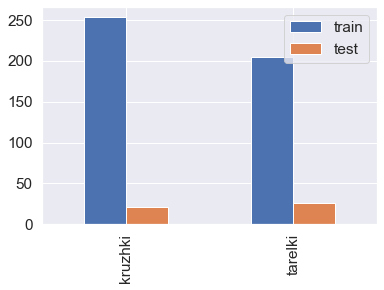

In [46]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

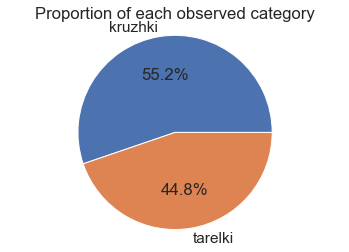

In [48]:
plt.pie(train_counts,
        explode=(0, 0), 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

# Scale the Data

In [49]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [50]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

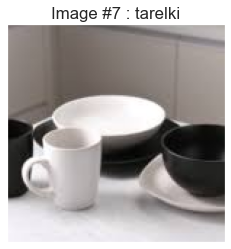

In [53]:
display_random_image(class_names, train_images, train_labels)

In [54]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

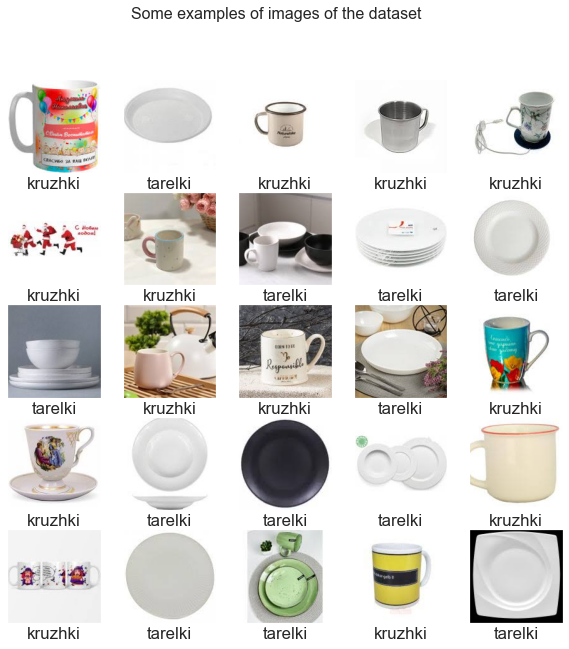

In [55]:
display_examples(class_names, train_images, train_labels)

# Relu and Relu

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [58]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
3/3 [==============================] - 4s 988ms/step - loss: 2.1275 - accuracy: 0.3743 - val_loss: 0.9384 - val_accuracy: 0.4565
Epoch 2/10
3/3 [==============================] - 3s 871ms/step - loss: 1.0232 - accuracy: 0.4727 - val_loss: 0.8027 - val_accuracy: 0.5435
Epoch 3/10
3/3 [==============================] - 3s 855ms/step - loss: 0.7255 - accuracy: 0.5628 - val_loss: 0.7659 - val_accuracy: 0.5652
Epoch 4/10
3/3 [==============================] - 3s 851ms/step - loss: 0.6466 - accuracy: 0.6585 - val_loss: 0.6372 - val_accuracy: 0.6739
Epoch 5/10
3/3 [==============================] - 3s 912ms/step - loss: 0.5559 - accuracy: 0.6967 - val_loss: 0.6256 - val_accuracy: 0.6848
Epoch 6/10
3/3 [==============================] - 3s 891ms/step - loss: 0.4883 - accuracy: 0.7842 - val_loss: 0.8478 - val_accuracy: 0.5543
Epoch 7/10
3/3 [==============================] - 3s 947ms/step - loss: 0.4826 - accuracy: 0.7623 - val_loss: 0.6380 - val_accuracy: 0.6848
Epoch 8/10
3/3 [====

In [60]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [61]:
test_loss = model.evaluate(test_images, test_labels)

2/2 [==============================] - 0s 44ms/step - loss: 0.8168 - accuracy: 0.6596


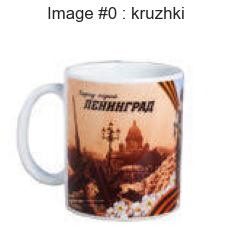

In [62]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

     kruzhki       0.59      0.76      0.67        21
     tarelki       0.75      0.58      0.65        26

    accuracy                           0.66        47
   macro avg       0.67      0.67      0.66        47
weighted avg       0.68      0.66      0.66        47



# Sigmoid and Relu

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [66]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
3/3 [==============================] - 4s 985ms/step - loss: 3.8693 - accuracy: 0.3579 - val_loss: 3.0039 - val_accuracy: 0.4565
Epoch 2/10
3/3 [==============================] - 3s 898ms/step - loss: 2.1197 - accuracy: 0.4891 - val_loss: 0.8070 - val_accuracy: 0.5435
Epoch 3/10
3/3 [==============================] - 3s 902ms/step - loss: 0.7696 - accuracy: 0.5164 - val_loss: 0.7951 - val_accuracy: 0.4565
Epoch 4/10
3/3 [==============================] - 3s 953ms/step - loss: 0.8172 - accuracy: 0.4454 - val_loss: 0.7949 - val_accuracy: 0.4565
Epoch 5/10
3/3 [==============================] - 3s 941ms/step - loss: 0.7677 - accuracy: 0.4454 - val_loss: 0.7082 - val_accuracy: 0.4565
Epoch 6/10
3/3 [==============================] - 3s 942ms/step - loss: 0.6949 - accuracy: 0.5328 - val_loss: 0.7236 - val_accuracy: 0.5435
Epoch 7/10
3/3 [==============================] - 3s 931ms/step - loss: 0.7200 - accuracy: 0.5546 - val_loss: 0.7156 - val_accuracy: 0.5435
Epoch 8/10
3/3 [====

In [68]:
test_loss = model.evaluate(test_images, test_labels)

2/2 [==============================] - 0s 43ms/step - loss: 0.7483 - accuracy: 0.4468


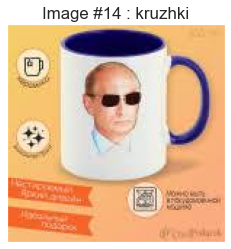

In [80]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [74]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

     kruzhki       0.45      1.00      0.62        21
     tarelki       0.00      0.00      0.00        26

    accuracy                           0.45        47
   macro avg       0.22      0.50      0.31        47
weighted avg       0.20      0.45      0.28        47



/Users/Nurmash/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Nurmash/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Nurmash/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
